In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

import xgboost as xgb

In [3]:
data = pd.read_excel('Zone1_Only_Sur_Inlier.xlsx',sheet_name='Sheet1')
# 使用每列的众数填充该列的缺失值
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [4]:
X=data.iloc[:,:-1]
y = data.iloc[:, -1]

In [5]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# 使用xgboost进行回归预测
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 1, n_estimators = 100)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

Test 1 fold MSE: 5.224182284469947
Test 1 fold R2: 0.6372316854860867


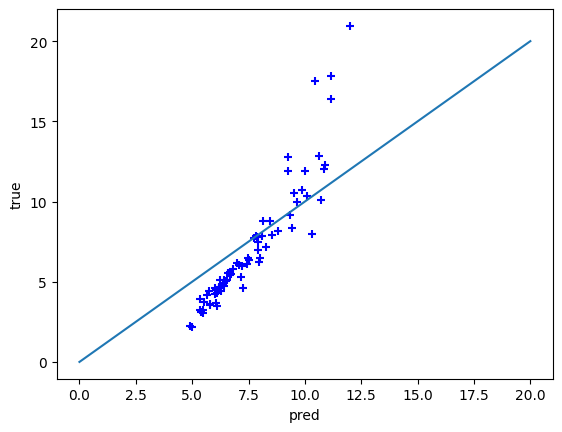

In [11]:
# 计算MSE和R2
test_MSE_1fold = mean_squared_error(y_test, y_pred)
test_R2_1fold = r2_score(y_test, y_pred)

print(f'Test 1 fold MSE: {test_MSE_1fold}')
print(f'Test 1 fold R2: {test_R2_1fold}')

# 绘制结果
plt.figure(3)
plt.scatter(y_pred, y_test, marker = '+', color = 'blue', s = 40)
plt.plot(np.array([0,20]),np.array([0,20]))
plt.xlabel('pred')
plt.ylabel('true')
plt.show()